In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [69]:
df = yf.download('AVAX-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-13,4.613968,4.915115,4.481499,4.896294,4.896294,28340
1,2020-07-14,4.909865,5.229564,4.762068,4.986754,4.986754,3957
2,2020-09-22,4.986754,11.463443,4.125380,5.234632,5.234632,288098840
3,2020-09-23,5.321654,5.329310,3.982604,4.118469,4.118469,173091214
4,2020-09-24,3.817925,4.751878,3.539887,4.566561,4.566561,96110964
...,...,...,...,...,...,...,...
827,2022-12-26,11.684330,11.764178,11.580630,11.723856,11.723856,100546246
828,2022-12-27,11.720731,11.780209,11.581322,11.646396,11.646396,130725347
829,2022-12-28,11.646214,11.655287,11.132728,11.202914,11.202914,139487054
830,2022-12-29,11.203087,11.208213,10.702117,10.992695,10.992695,118611566


In [70]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
822,2022-12-21,11.696437
823,2022-12-22,11.843431
824,2022-12-23,11.781727
825,2022-12-24,11.680429
826,2022-12-25,11.684593
827,2022-12-26,11.723856
828,2022-12-27,11.646396
829,2022-12-28,11.202914
830,2022-12-29,10.992695
831,2022-12-30,10.870249


In [71]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/c8q0xtft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/m8xzic2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48612', 'data', 'file=/tmp/tmpjb5rn7zm/c8q0xtft.json', 'init=/tmp/tmpjb5rn7zm/m8xzic2c.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_modelbgz196se/prophet_model-20230105085524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:55:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:55:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
df = df[:-1]
df

,ds,y
0,2020-07-13,4.896294
1,2020-07-14,4.986754
2,2020-09-22,5.234632
3,2020-09-23,4.118469
4,2020-09-24,4.566561
...,...,...
826,2022-12-25,11.684593
827,2022-12-26,11.723856
828,2022-12-27,11.646396
829,2022-12-28,11.202914


In [73]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-13,3.964939,-29.245217,-8.988461,3.964939,3.964939,-22.605407,-22.605407,-22.605407,-0.147211,-0.147211,-0.147211,-22.458196,-22.458196,-22.458196,0.0,0.0,0.0,-18.640468
1,2020-07-14,3.912506,-30.010454,-8.006339,3.912506,3.912506,-22.266013,-22.266013,-22.266013,0.124595,0.124595,0.124595,-22.390608,-22.390608,-22.390608,0.0,0.0,0.0,-18.353506
2,2020-09-22,0.242226,-9.107391,12.099939,0.242226,0.242226,1.185509,1.185509,1.185509,0.124595,0.124595,0.124595,1.060914,1.060914,1.060914,0.0,0.0,0.0,1.427735
3,2020-09-23,0.189794,-8.650932,12.796764,0.189794,0.189794,1.548427,1.548427,1.548427,0.173457,0.173457,0.173457,1.374970,1.374970,1.374970,0.0,0.0,0.0,1.738220
4,2020-09-24,0.137361,-8.406769,11.403965,0.137361,0.137361,1.605340,1.605340,1.605340,-0.034502,-0.034502,-0.034502,1.639842,1.639842,1.639842,0.0,0.0,0.0,1.742701


In [74]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [75]:
future.tail()

,ds
1192,2023-12-26
1193,2023-12-27
1194,2023-12-28
1195,2023-12-29
1196,2023-12-30


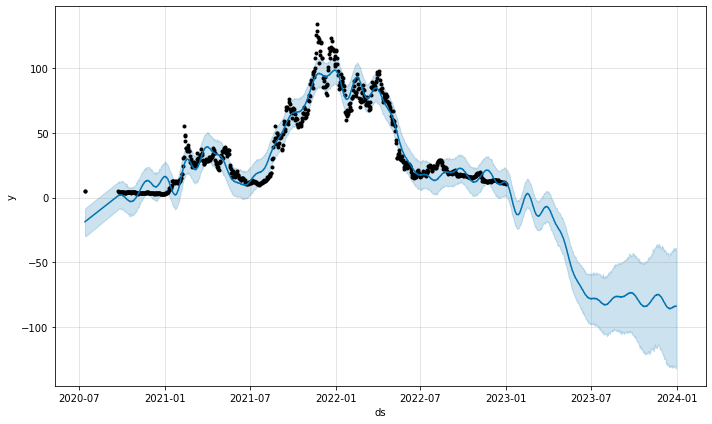

In [76]:
plot1 = m.plot(forecast)